# DECISION TREE

Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:

1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
    
Check for missing values, outliers, and inconsistencies in the data.
    
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
    
3. Feature Engineering:
    
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
    
4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).
                                                  
Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?




In [1]:
import pandas as pd
df=pd.read_csv("C:\python class basics DS\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# EDA

In [2]:
#Perform exploratory data analysis to understand the structure of the dataset.

# Print the first five rows of the DataFrame
print(df.head())

# Print the number of rows and columns in the DataFrame
print(df.shape)

# Print the data types of each column
print(df.dtypes)

# Print the descriptive statistics of the numerical columns
print(df.describe())

# Print the number of missing values in each column
print(df.isnull().sum())



   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  
(908, 13)
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


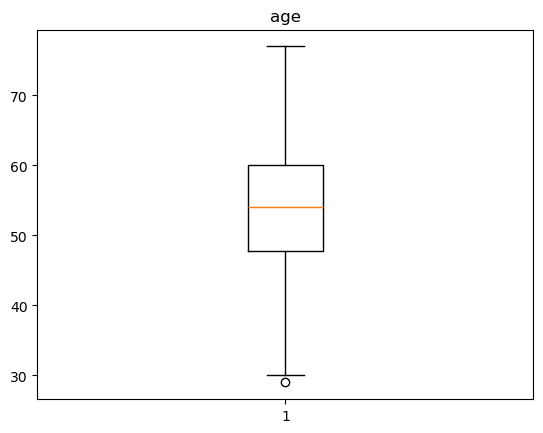

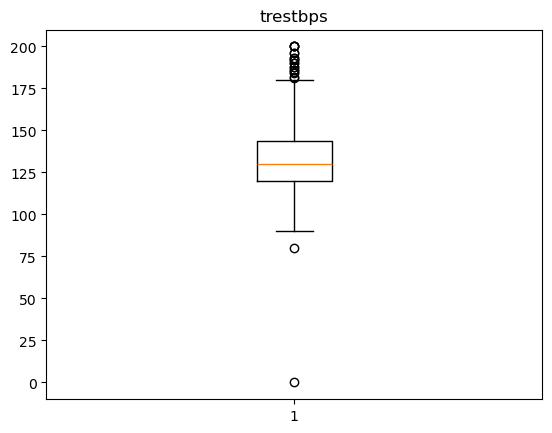

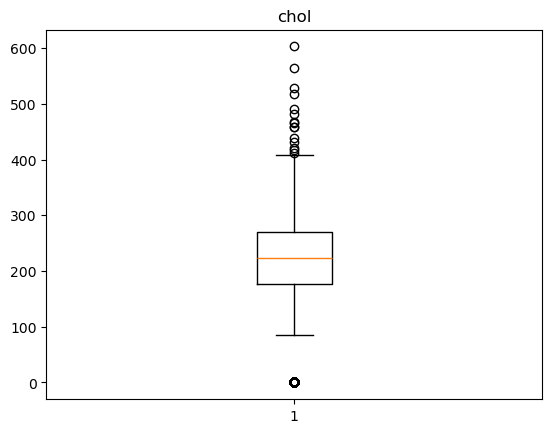

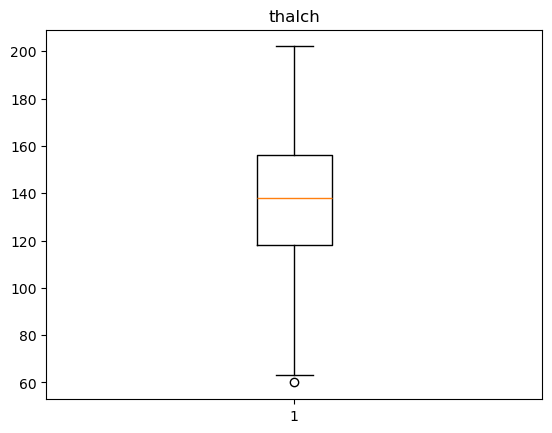

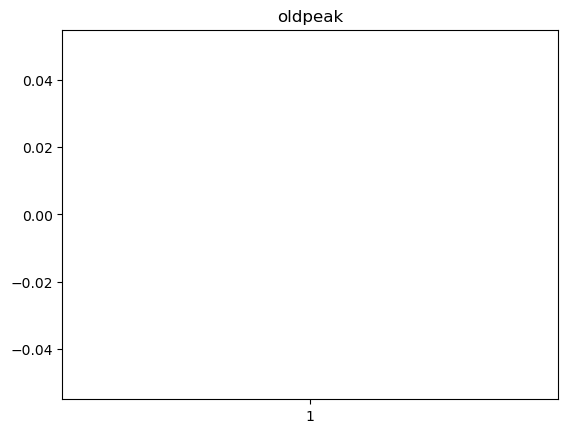

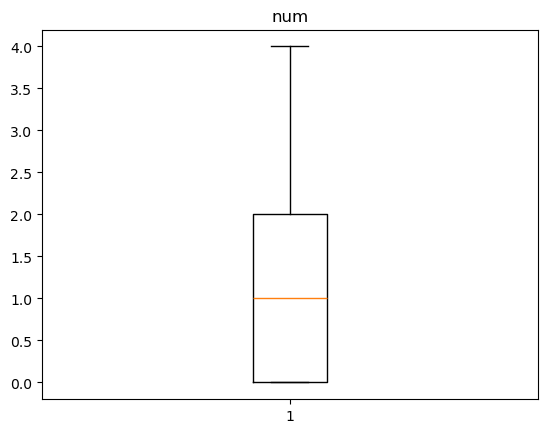

Unique values for sex: ['Male' 'Female']
Unique values for cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values for restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values for exang: ['FALSE' 'TRUE' 'TURE']
Unique values for slope: ['downsloping' 'flat' 'upsloping']
Unique values for thal: ['fixed defect' 'normal' 'reversable defect']


In [3]:
#Check for missing values, outliers, and inconsistencies in the data..

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check for outliers using boxplots
import matplotlib.pyplot as plt

for column in df.select_dtypes(include=['int64', 'float64']):
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()

# Check for inconsistencies
for column in df.select_dtypes(include=['object']):
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}")


C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


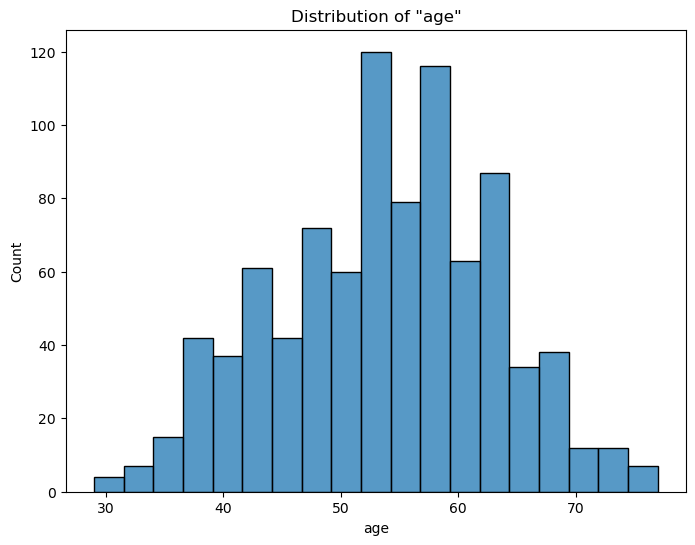

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


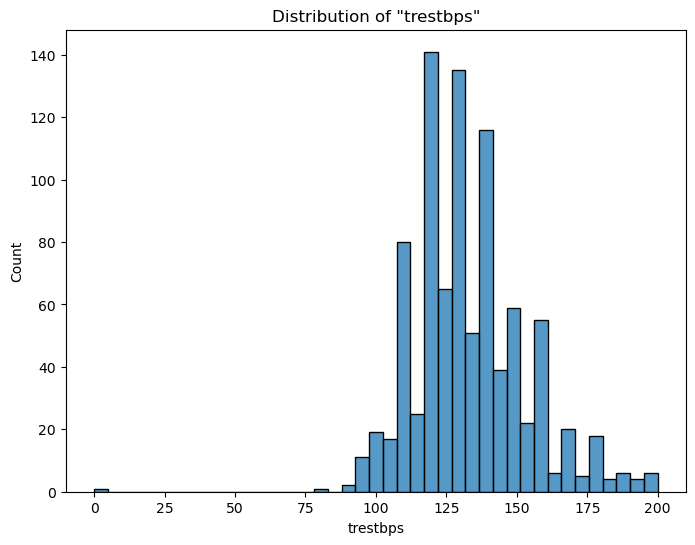

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


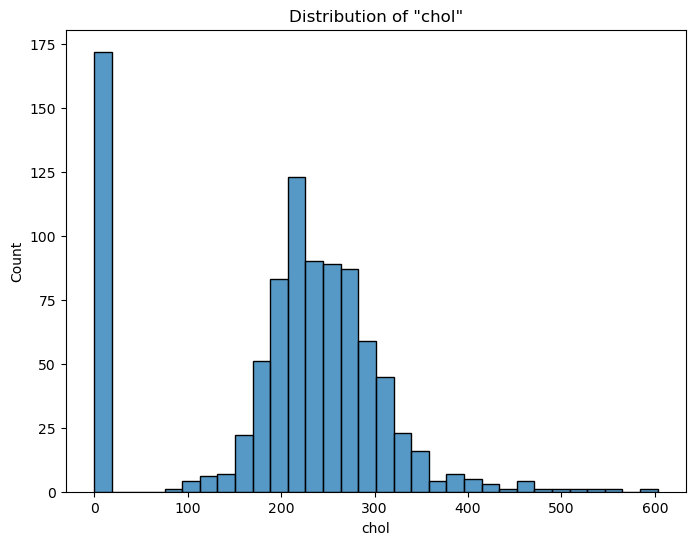

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


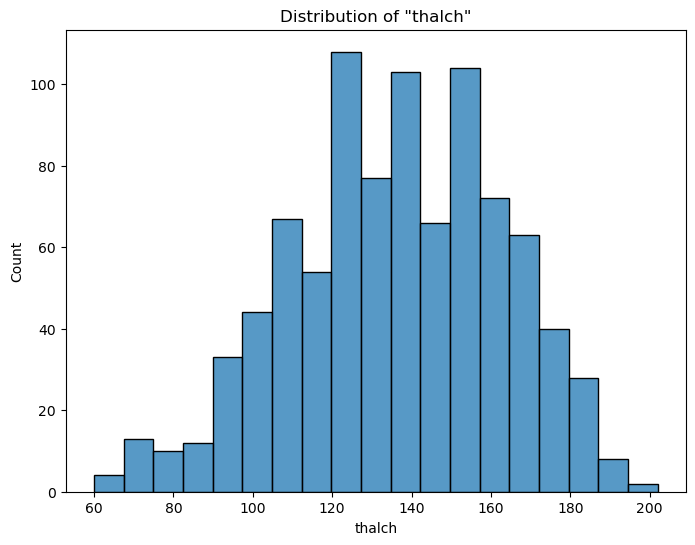

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


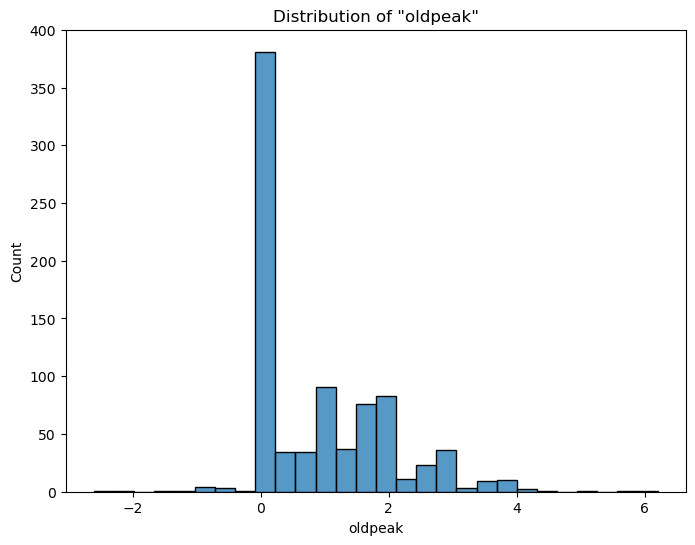

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


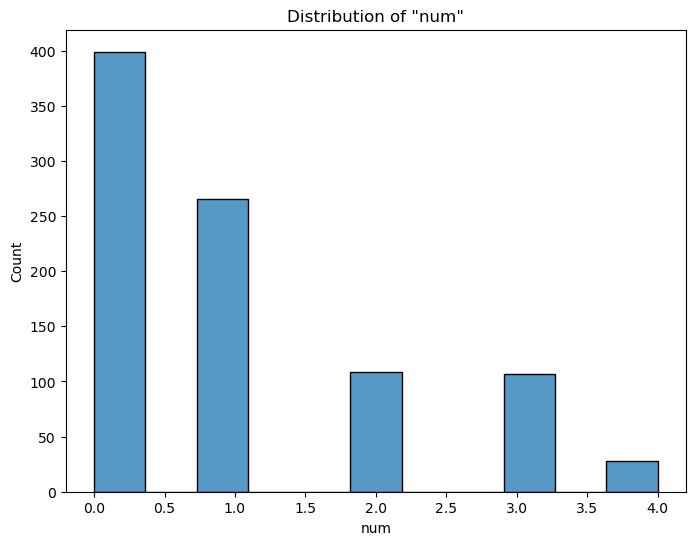

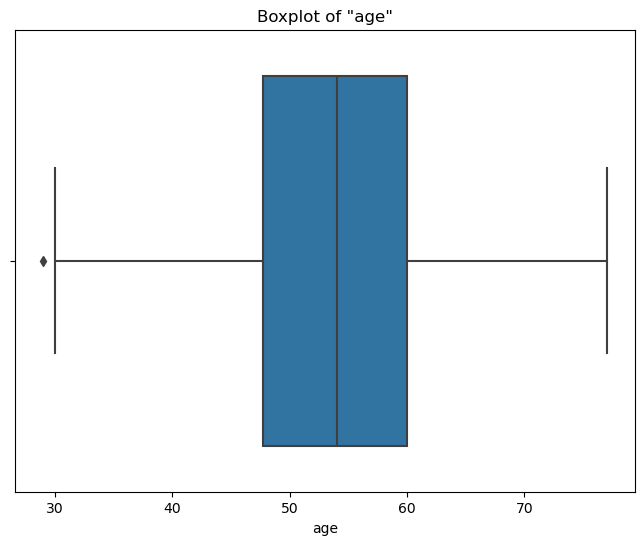

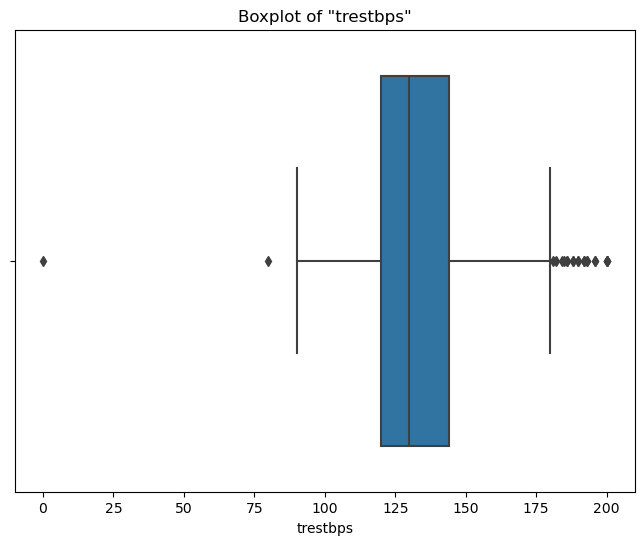

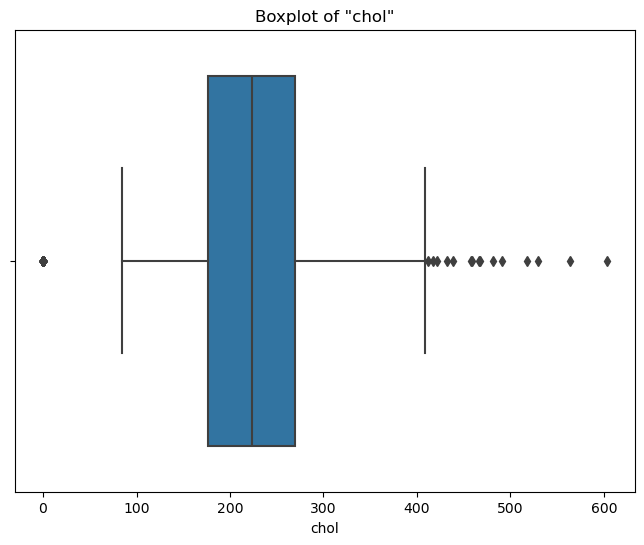

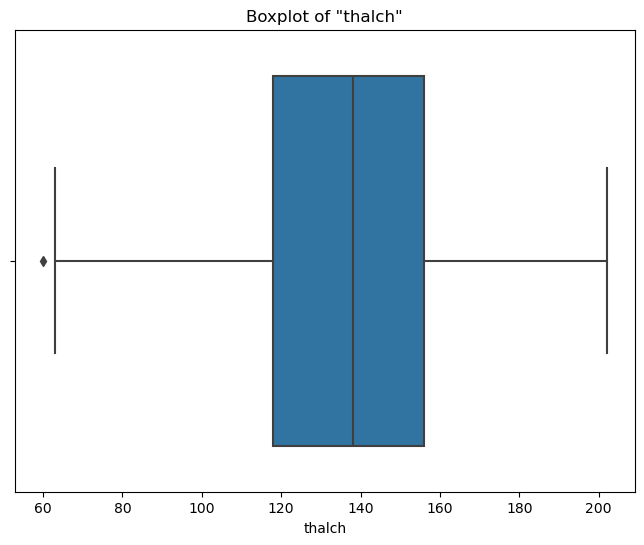

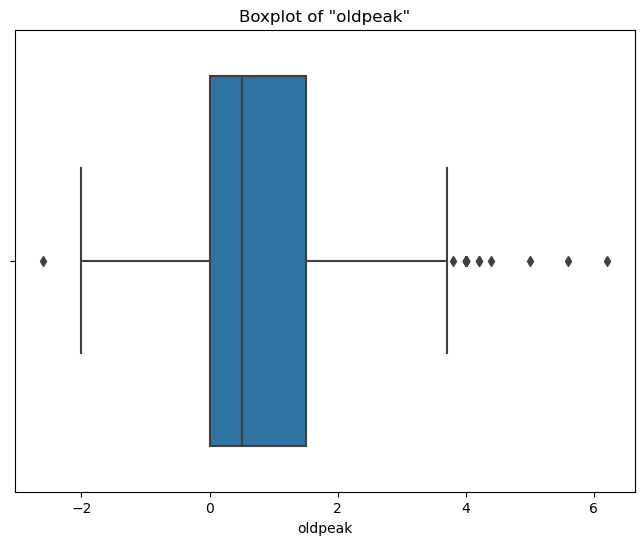

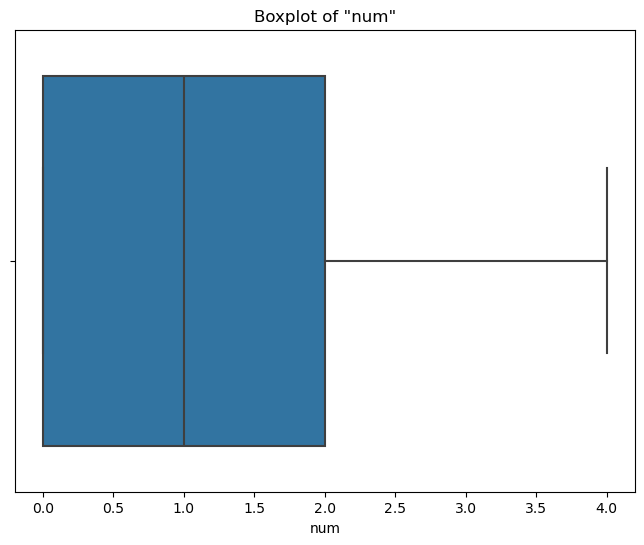

In [4]:
#Visualize the distribution of features, including histograms, box plots, and correlation matrices.

import seaborn as sns

# Histograms for numerical features
for col in df.select_dtypes(include=['int64', 'float64']):
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=col)
  plt.title(f'Distribution of "{col}"')
  plt.show()

# Boxplots for numerical features
for col in df.select_dtypes(include=['int64', 'float64']):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, x=col)
  plt.title(f'Boxplot of "{col}"')
  plt.show()


In [5]:

# Handling missing values
df["oldpeak"] = df['oldpeak'].fillna(df['oldpeak'].mean())


# Data transformation

In [6]:
# label encode for object varibles.

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the categorical columns
for col in df.select_dtypes(include='object'):
  df[col] = encoder.fit_transform(df[col])

# Print the encoded DataFrame
print(df.head())


   age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      0      2.3   
1   41    1   1       135   203  False        1     132      0      0.0   
2   57    1   0       140   192  False        1     148      0      0.4   
3   52    1   3       118   186  False        0     190      0      0.0   
4   57    1   0       110   201  False        1     126      1      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [7]:
# label encode for fbs column.

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the fbs column
df['fbs'] = encoder.fit_transform(df['fbs'])

# Print the encoded DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   41    1   1       135   203    0        1     132      0      0.0      1   
2   57    1   0       140   192    0        1     148      0      0.4      1   
3   52    1   3       118   186    0        0     190      0      0.0      1   
4   57    1   0       110   201    0        1     126      1      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


# Data partition

In [8]:

X = df.drop('thal', axis=1)
y = df['thal']


In [9]:
#Split the dataset into training and testing sets (e.g., using an 80-20 split).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (726, 12)
y_train shape: (726,)
X_test shape: (182, 12)
y_test shape: (182,)


# model fitting

In [10]:
 #Implement a Decision Tree Classification model using a library like scikit-learn.

from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Accuracy: 0.4340659340659341


In [11]:
#Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set, obtaining probabilities for each class
y_pred_proba = model.predict_proba(X_test) # Change to predict_proba to get class probabilities

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Handle multiclass ROC AUC calculation using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') # Use y_pred_proba

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.4340659340659341
Precision: 0.429192945369416
Recall: 0.4340659340659341
F1-score: 0.42893639349788437
ROC-AUC: 0.5759250987090513


In [12]:
#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Create a new DecisionTreeClassifier object with the best hyperparameters
model_best = DecisionTreeClassifier(**best_params)

# Train the new model on the training data
model_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_best = model_best.predict(X_test)

# Evaluate the new model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the accuracy of the new model
print(f"Accuracy with best hyperparameters: {accuracy_best}")


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Accuracy with best hyperparameters: 0.489010989010989


In [13]:
#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.4725274725274725
Precision: 0.4006390748630554
Recall: 0.4725274725274725
F1-score: 0.4134975838134788


In [14]:
#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
  'max_depth': [3, 5, 7, 9],
  'min_samples_split': [2, 5, 10],
  'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy with best hyperparameters: {accuracy}")


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Accuracy with best hyperparameters: 0.489010989010989


# Analyse the performance of the Decision Tree model using the evaluation metrics obtained

Accuracy: 0.489010989010989
Precision: 0.4006390748630554
Recall: 0.4725274725274725
F1-score: 0.4134975838134788
Confusion Matrix:
 [[ 0 11 31]
 [ 0 29 42]
 [ 0  9 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.59      0.41      0.48        71
           2       0.45      0.87      0.59        69

    accuracy                           0.49       182
   macro avg       0.35      0.43      0.36       182
weighted avg       0.40      0.49      0.41       182



C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


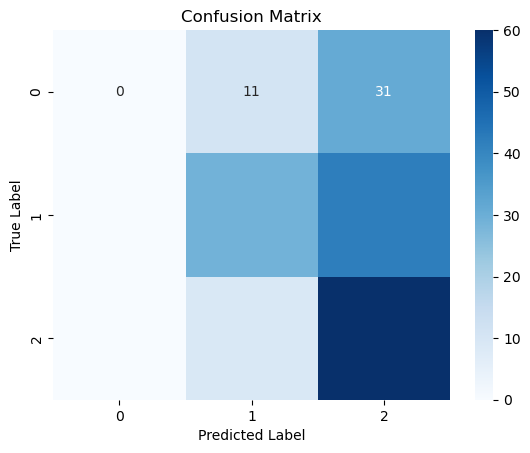

In [15]:

from sklearn import metrics # Import the metrics module

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {confusion_matrix}")

# Create a classification report
classification_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report:\n {classification_report}")

# Visualize the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualizing the decision tree structure 

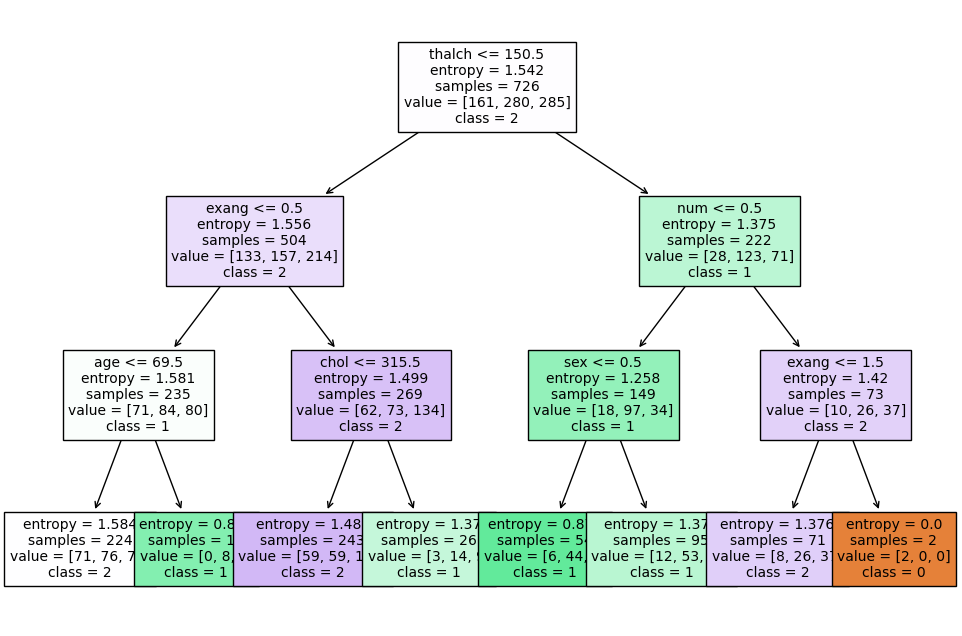

In [16]:


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier object with the best hyperparameters
model_best = DecisionTreeClassifier(**best_params)

# Train the new model on the training data
model_best.fit(X_train, y_train)

# Visualize the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(model_best, feature_names=X.columns, class_names=df['thal'].unique().astype(str), fontsize=10, filled=True)
plt.show()


here root node is thalch and subnodes are exang and num

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models include:

1. Maximum depth: This parameter controls the depth of the decision tree. A larger maximum depth allows for more complex decision boundaries, but can also lead to overfitting.

2. Minimum samples split: This parameter controls the minimum number of samples required to split a node in the decision tree. A larger minimum samples split can help to prevent overfitting.

3. Criterion: This parameter controls the function used to evaluate the quality of a split. Common criteria include the Gini index and the entropy.

-The effects of these hyperparameters on the model's performance are as follows:

1. Maximum depth: Increasing the maximum depth can improve the model's accuracy, but can also lead to overfitting.

2. Minimum samples split: Increasing the minimum samples split can help to prevent overfitting, but can also lead to underfitting.

3. Criterion: The choice of criterion can affect the model's accuracy and interpretability.

The optimal values for these hyperparameters will depend on the specific dataset and problem.


# What is the difference between the Label encoding and One-hot encoding?

-Label encoding:
1.Label encoding is a technique used to transform categorical data into numerical data.

2.It assigns a unique integer to each category.

3.For example, if we have a categorical column with three categories: "apple", "banana", and "orange", label encoding would assign the integers 0, 1, and 2 to these categories, respectively.

-One-hot encoding:

1.One-hot encoding is another technique used to transform categorical data into numerical data.

2.It creates a new binary feature for each category.

3.For example, if we have a categorical column with three categories: "apple", "banana", and "orange", one-hot encoding would create three new features: "apple", "banana", and "orange".

4.Each of these features would be binary, with a value of 1 if the observation belongs to that category and a value of 0 otherwise.

-The main difference between label encoding and one-hot encoding is that label encoding assigns a single integer to each category, while one-hot encoding creates a new binary feature for each category.
